# Discrete Fourier Transform in Python

This notebook is a quick refresher on how to perform FFT in python/scipy.

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from scipy.fftpack import fft

We define:

- $N$: number of samples
- $f_s$: sampling frequency/rate in samples/second

In [45]:
N = 1000
f_s = 100

Period between samples:

In [46]:
T = 1/f_s

In [47]:
print(T)

0.01


Create time vector, each element corresponds to a measurement

In [48]:
t = np.linspace(0, T*N, N)

The signal which we are sampling:

\begin{align}
s(t) = 0.1 sin(2\pi 5t) + sin(2\pi 3t - 0.25\pi)
\end{align}

In [49]:
x_t = 0.1*np.sin(2*np.pi*5*t) + np.sin(2*np.pi*3*t-np.pi/4)

Text(0.5, 1.0, 'Visualizing samples')

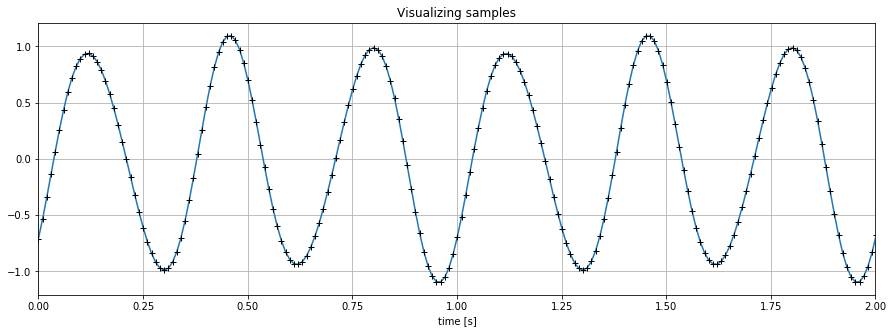

In [50]:
plt.figure(figsize=(15,5))
plt.plot(t, x_t)
plt.plot(t, x_t, "k+")
plt.xlabel("time [s]")
plt.xlim([0, 2])
plt.grid()
plt.title("Visualizing samples")

Note that we can describe the **period** of each sinus component in number of samples:

- $0.1 sin(2\pi 5t)$: **33** samples
- $sin(2\pi 3t - 0.25\pi)$ : **20** samples

Alternatively we can express the frequency in the reciprocal:

- $0.1 sin(2\pi 5t)$: **1/33 = 0.0303**
- $sin(2\pi 3t - 0.25\pi)$ : **1/20 = 0.05**

Alternatively we can express the frequency relative to the number of samples $N=1000$:

- $0.1 sin(2\pi 5t)$: **1000/33 = 30.30**
- $sin(2\pi 3t - 0.25\pi)$ : **1000/20 = 50**

## FFT

We perform the FFT on the sample array, note that the time vector ${t}$ is not used in the `fft` call:

In [83]:
a_f = fft(x_t)

In [84]:
a_f.dtype

dtype('complex128')

FFT returns a symmetric shape with positive frequencies on the right side and negative on the left:

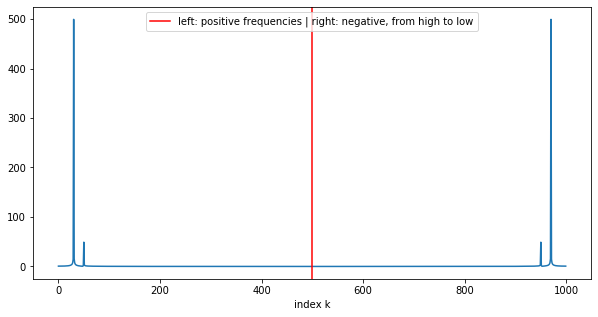

In [94]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f)) # we take abs in order to get the magnitude of a complex number
plt.axvline(N//2, color="red", label="left: positive frequencies | right: negative, from high to low")
plt.xlabel("index k")
plt.legend();

Because we are interested in positive frequencies for now we cut the returned array:

In [95]:
a_f_positive = a_f[:N//2]

In [96]:
a_f_positive.shape

(500,)

Each element in `a_f` represents the real and imaginary part (amplitude $A_i$ and phase $\phi_i$) for a specific frequency $f_i$.

The "frequency" after the FFT is defined as $\frac{N}{s_i}$ in the period of specific sinus component. The period $s_i$ is expressed in number of samples.

I.e. a sinus component with a frequency of $5 Hz$ or period of $\frac{1}{5Hz} = 0.2s$ is $\frac{0.2s}{T_s} = \frac{0.2s}{0.01s} = 20$ samples long. Thus its magnitude peak should appear at $\frac{N}{s_i} = \frac{1000}{20} = 50$.

- $0.1 sin(2\pi 5t)$: low peak (because of 0.1) at $k=50$
- $sin(2\pi 3t - 0.25\pi)$: greater peak at $k= 30.303 \approx 30$

Text(0.5, 0, 'frequency in $k = N/s_i$')

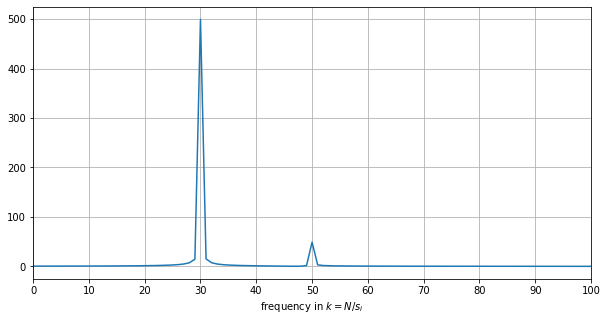

In [103]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f_positive))
plt.xlim([0, 100])
plt.xticks(range(0, 101, 10))
plt.grid()
plt.xlabel("frequency in $k = N/s_i$")

In order to relate the sample-frequencies (as $N/1$) into time domain we need to convert the $k$ into frequencies as $1/s$.



\begin{align}
k = \frac{N}{s_i} = \frac{N}{T_i/T_s} = \frac{N f_i}{1/T_s} = \frac{N f_i}{f_s}
\end{align}

Our translation formula from $k$ to frequency is the following

\begin{align}
\Rightarrow f_i =& f_s\frac{k}{N}
\end{align}

In [108]:
f_i = np.arange(0, N//2)*f_s/N

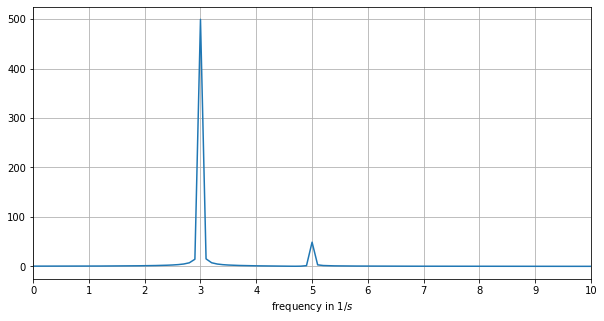

In [113]:
plt.figure(figsize=(10,5))
plt.plot(f_i, np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);

We need to normalize the magnitude of the peaks by the factor of $\frac{2}{N}$:

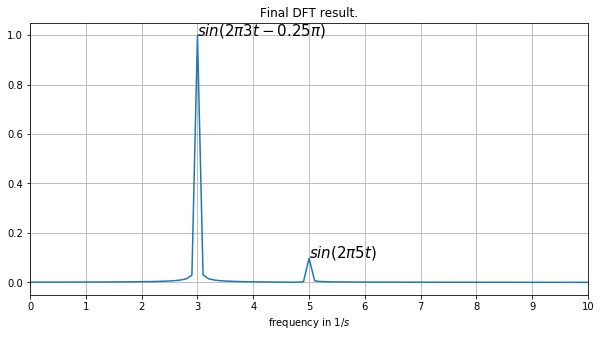

In [122]:
plt.figure(figsize=(10,5))
plt.plot(f_i, 2/N*np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);
plt.title("Final DFT result.")
plt.text(3, 1, "$sin(2\pi 3t - 0.25\pi)$", fontdict={"size": 15})
plt.text(5, 0.1, "$sin(2\pi 5t)$", fontdict={"size": 15});

As you can see we found both sinus components.

## Phase

We could find the magnitudes and the frequencies of both signals but not the $45°$ phase of the slower $3Hz$ signal.

In the previous section we saw that the result of the FFT algorithm is a complex array. Let's plot the real and imaginary parts relative to frequency.

(0, 10)

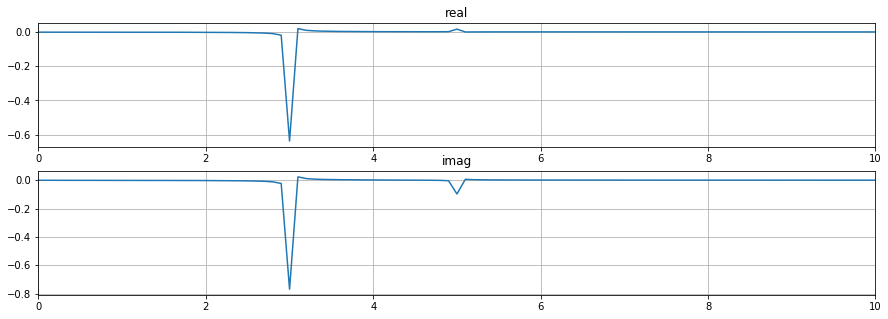

In [128]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(2, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])

Lets calculate the angle of the complex number:

\begin{align}
\text{arctan} \frac{imag}{real}
\end{align}

In [151]:
angle = np.arctan(2/N*np.imag(a_f_positive),(2/N*np.real(a_f_positive)))*360/(2*np.pi)

(0, 10)

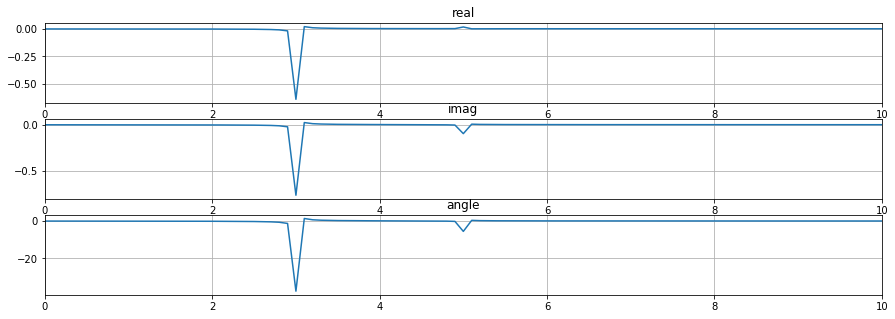

In [152]:
plt.figure(figsize=(15, 5))
plt.subplot(3, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 3)
plt.title("angle")
plt.plot(f_i, angle)
plt.grid()
plt.xlim([0, 10])